# F30 Stellar CCD Photometry in modern astronomy

Experiment carried out by Mathieu Kaltschmidt and Quirinus Schwarzenböck at Max-Planck-Institute for Astronomy (MPIA) in Heidelberg on the 27th/28th of August 2018. <br>

__Supervisor:__ Asmita Bhandare <br>

__Comment:__ <br> 
Not the whole evaluation of this experiment was done in this notebook. Some parts were already evaluated using software on a computer at MPIA (e.g. StarFinder, IRAF or already predefined Python Scripts)

## Evaluation of the data measured with the 70cm KING telescope at MPIA

### 4.2 Determination of the band gap of silicon

In [1]:
#Useful packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma


#Plot settings
plt.style.use('classic')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [2]:
#Theory

#Boltzmann constant
kb = 1.38*10**(-23) #J/K

#Theoretical curve for the dark current
def dark_current(x,c0,Eg_red):
    return c0*np.exp(-Eg_red*x)

In [3]:
#DATA

counts_all = np.loadtxt(r'DATA/darks/mean_dark.txt', skiprows=1, unpack=True)
counts_std_all = np.loadtxt(r'DATA/darks/stv_dark.txt', skiprows=1, unpack=True)

#Temperature data in Kelvin
tempC = np.loadtxt(r'DATA/darks/temp.txt', skiprows=1, unpack=True)
tempK = tempC + 273.15 

#Eliminating (wrong?) data
counts = counts_all[1:123]
counts_std = counts_std_all[1:123]

#Preparing DATA for plotting
xval = 1/tempK
yval = counts*tempK**(-3/2)
yval_err = counts_std*tempK**(-3/2)

In [4]:
#Fitting

fitrange = np.linspace(0.0035,0.0057,100)
popt,pcov= curve_fit(dark_current,xval[:70],yval[:70], sigma=yval_err[:70])

#Calculating the band gap using our fitting results
Eg = popt[1]*2*kb/1.602e-19
Eg_err = np.sqrt(np.diag(pcov))[1]*2*kb/1.602e-19

print('The band gap of silicon has been determined to:')
print('Eg = (' + str(round(Eg,3)) + ' +/- ' + str(round(Eg_err,3)) + ') eV')

The band gap of silicon has been determined to:
Eg = (1.259 +/- 0.005) eV


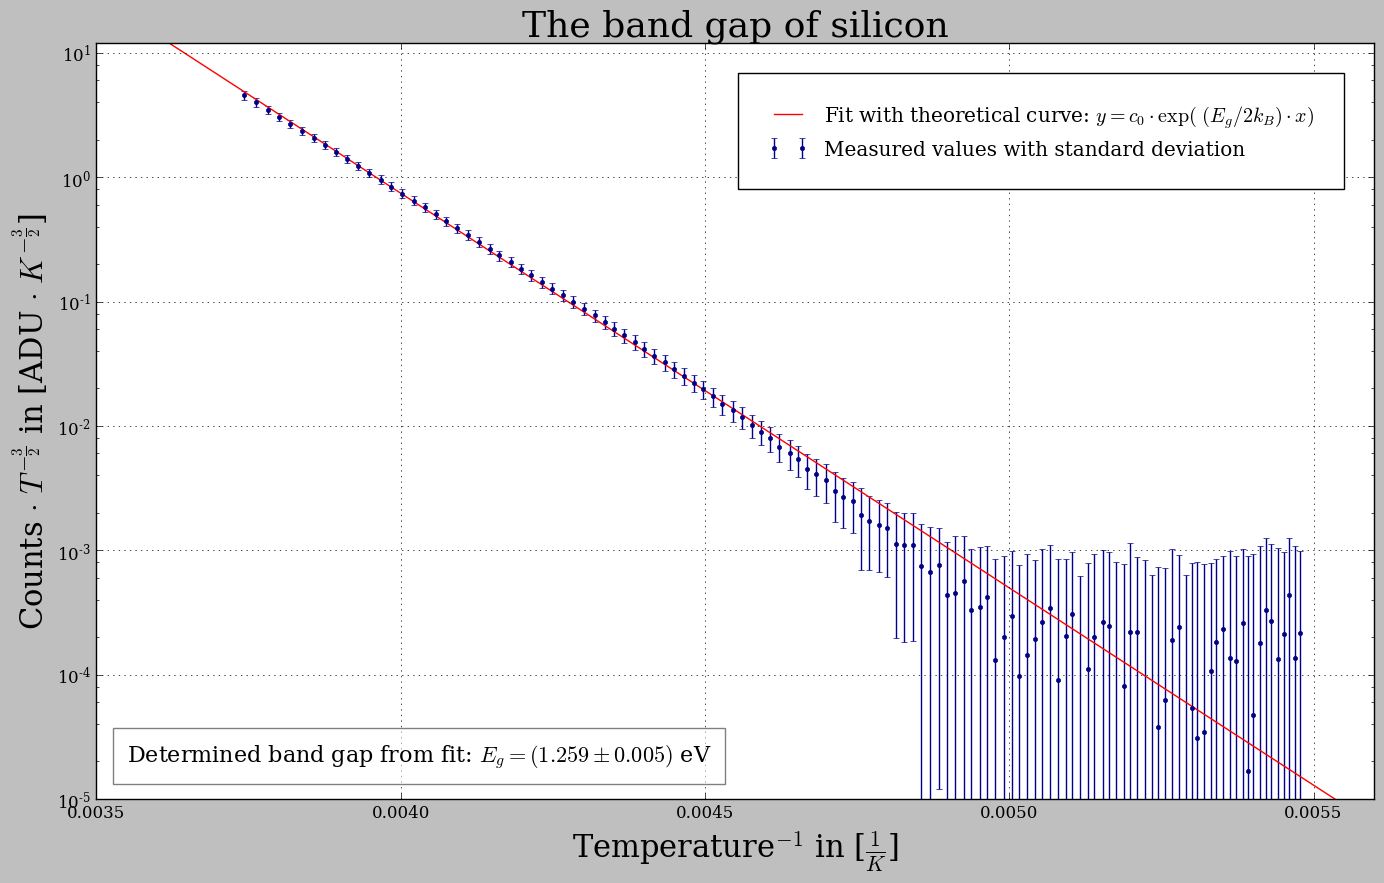

In [5]:
#Plotting

plt.errorbar(xval, yval, yerr=yval_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Measured values with standard deviation')
plt.plot(fitrange,dark_current(fitrange,*popt),color='red', label='Fit with theoretical curve: $y=c_0\cdot\exp( \ (E_g/2k_B)\cdot x)$')
plt.xlim(0.0035,0.0056)
plt.ylim(1e-5,12)
plt.yscale('log')
plt.title("The band gap of silicon", size = 26)
plt.xlabel(r'Temperature$^{-1}$ in [$\frac{1}{K}$]', size=22)
plt.ylabel(r'Counts $\cdot $ $T^{-\frac{3}{2}}$ in [ADU $\cdot \ K^{-\frac{3}{2}}$]', size=22)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')
plt.text(0.00355,2e-5, "Determined band gap from fit: $E_g = (1.259 \pm 0.005)$ eV",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/band_gap.pdf', format='PDF')

### Estimation of the bias

In [6]:
#Bias DATA

bias_lin = np.loadtxt(r'DATA/linearity/bias_lin.txt', skiprows=1, unpack=True)
bias_sens = np.loadtxt(r'DATA/sensitivity/bias_sens.txt', skiprows=1, unpack=True)
bias_at_end = 1343.9
bias_at_end_scatter = 2.1

### 4.3 Flat field corrections

#### Plotting the histograms of the normalized master flat fields

In [7]:
# Histogram DATA

valuesR, countsR = np.loadtxt(r'DATA/flats/hist_R.txt', usecols = (0,1), unpack=True)
valuesV, countsV = np.loadtxt(r'DATA/flats/hist_V.txt', usecols = (0,1), unpack=True)
valuesI, countsI = np.loadtxt(r'DATA/flats/hist_I.txt', usecols = (0,1), unpack=True)

In [8]:
#Preparing the histograms

xR = countsR
binsR = valuesR

xV = countsV
binsV = valuesV

xI = countsI
binsI = valuesI

colors = ['darkorange','green','gold','blue']

#### A. Histogram for the R-filter

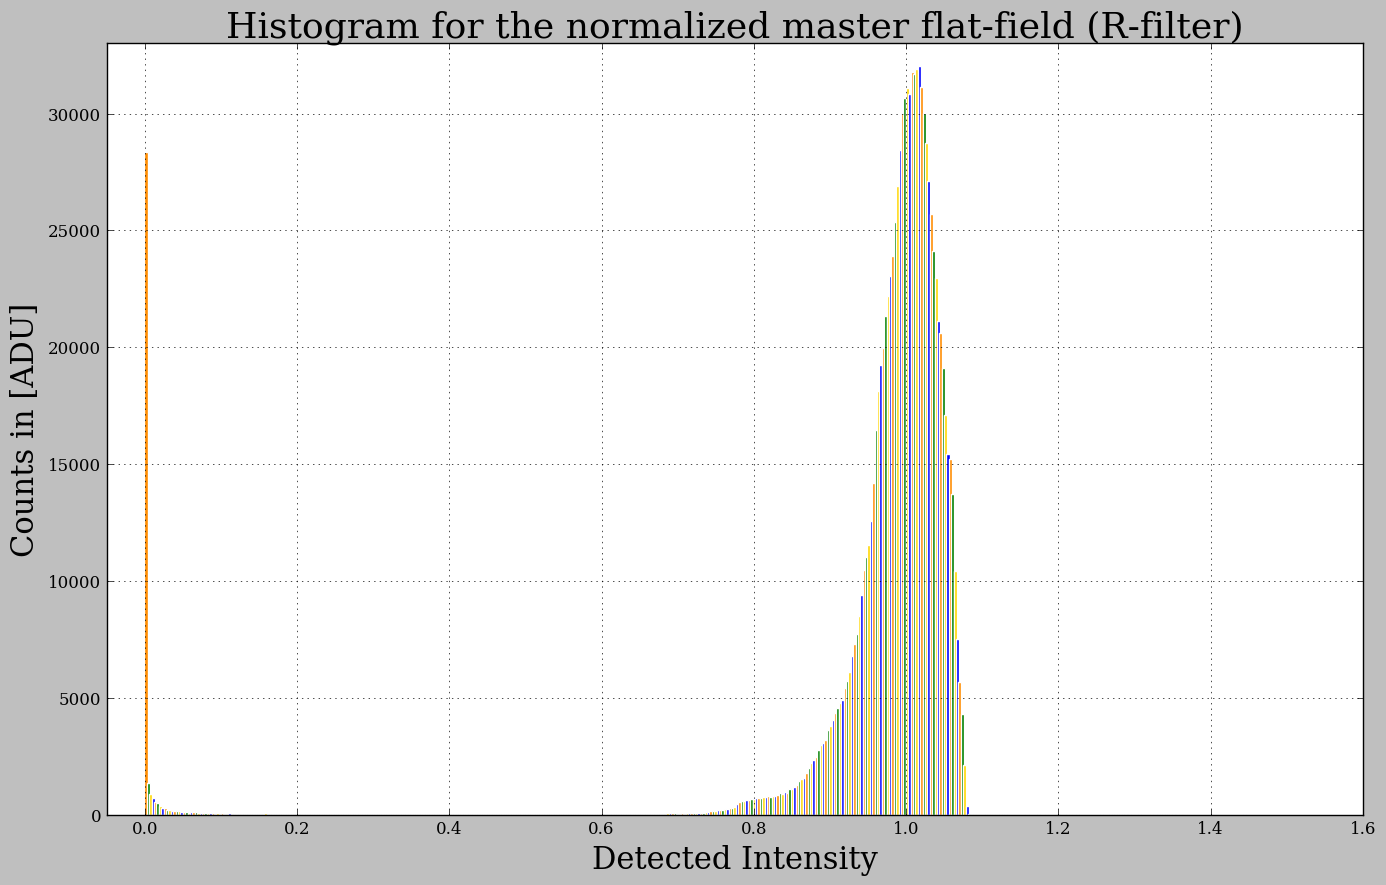

In [10]:
#Plotting R

plt.bar(binsR,xR,width=0.004,edgecolor = 'w',color = colors)
plt.xlim(-0.05,1.6)
plt.ylim(0,33000)

plt.title("Histogram for the normalized master flat-field (R-filter)", size = 26)
plt.ylabel(r'Counts in [ADU]', size=22)
plt.xlabel(r'Detected Intensity', size=22)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/histR.pdf', format='PDF')

#### B. Histogram for the V-filter

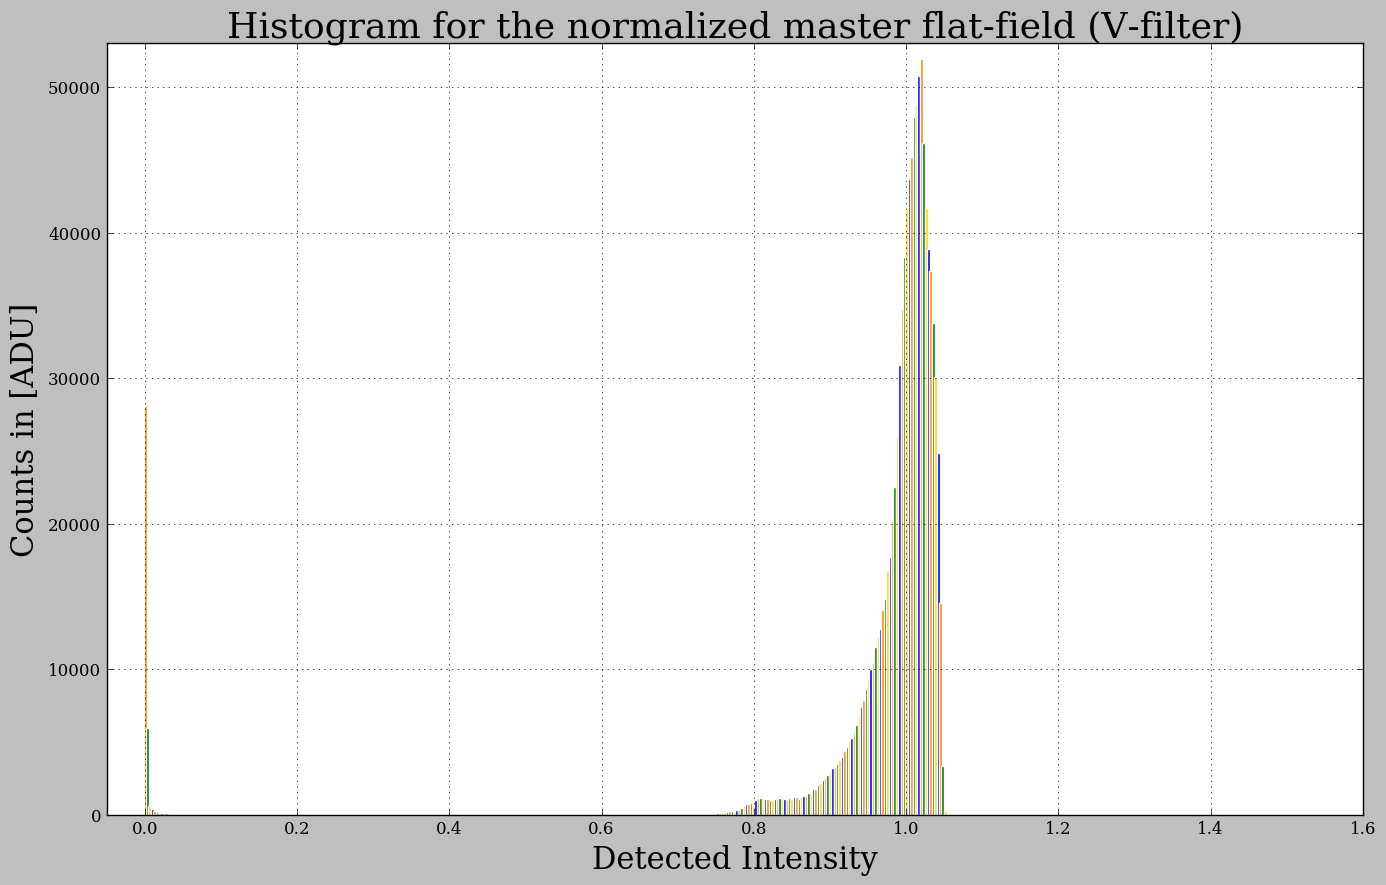

In [11]:
#Plotting V

plt.bar(binsV,xV,width=0.004,edgecolor = 'w',color = colors)
plt.xlim(-0.05,1.6)
plt.ylim(0,53000)

plt.title("Histogram for the normalized master flat-field (V-filter)", size = 26)
plt.ylabel(r'Counts in [ADU]', size=22)
plt.xlabel(r'Detected Intensity', size=22)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/histV.pdf', format='PDF')

#### C. Histogram for the I-filter

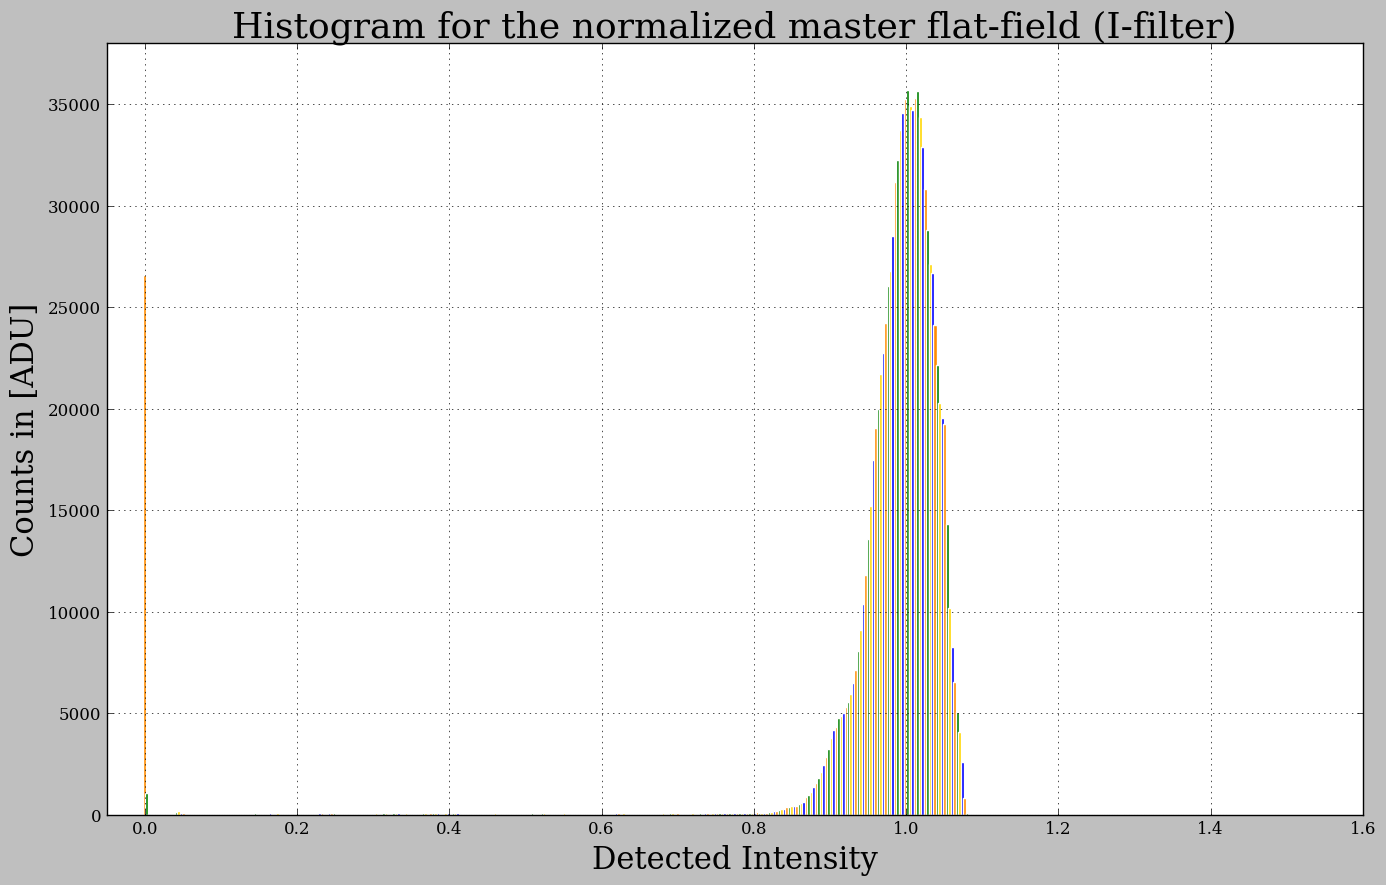

In [12]:
#Plotting I

plt.bar(binsI,xI,width=0.004,edgecolor = 'w',color = colors)
plt.xlim(-0.05,1.6)
plt.ylim(0,38000)

plt.title("Histogram for the normalized master flat-field (I-filter)", size = 26)
plt.ylabel(r'Counts in [ADU]', size=22)
plt.xlabel(r'Detected Intensity', size=22)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/histI.pdf', format='PDF')

### 4.4 Linearity and dynamical range of the CCD

In [13]:
#Theory

def linfit(x,a,b):
    return a*x+b

#### a) R-filter ($ \ \lambda$ = 658 +/- 69 nm)

In [14]:
#DATA 

linearR = np.loadtxt(r'DATA/linearity/meanR.txt', skiprows=1, unpack=True)
linearR_std = np.loadtxt(r'DATA/linearity/stvR.txt', skiprows=1, unpack=True)
timeR = np.loadtxt(r'DATA/linearity/timeR.txt', skiprows=1, unpack=True)

In [15]:
#Fitting

fitrangeR = np.linspace(0.1,1.1,2)
poptR,pcovR = curve_fit(linfit,timeR,linearR, sigma=linearR_std)

#Results
print("The fit determined to proportionality for the R-filter to: (" + str(round(poptR[0]*10**(-3),2)) + ' +/- ' + str(round(np.sqrt(pcovR[0,0])*10**(-3),2)) + ") 10e3 1/s" )

The fit determined to proportionality for the R-filter to: (60.12 +/- 0.29) 10e3 1/s


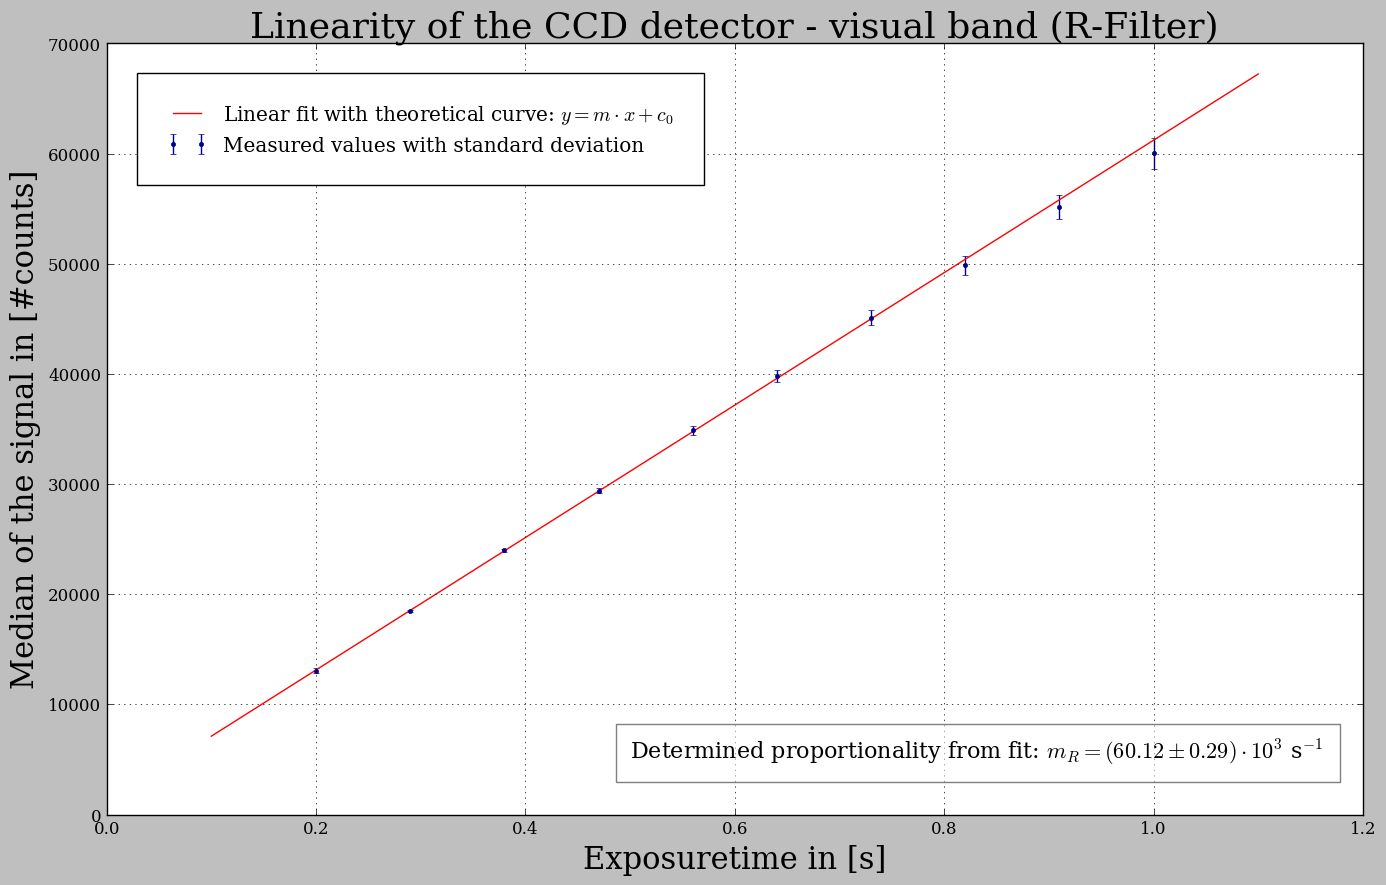

In [16]:
#Plotting

plt.errorbar(timeR, linearR, yerr=linearR_std,linewidth=1,linestyle='',marker='.',color='darkblue',label='Measured values with standard deviation')
plt.plot(fitrangeR,linfit(fitrangeR,*poptR),color='red', label='Linear fit with theoretical curve: $y= m\cdot x + c_0$')
plt.xlim(0,1.2)
plt.title("Linearity of the CCD detector - visual band (R-Filter)", size = 26)
plt.xlabel(r'Exposuretime in [s]', size=22)
plt.ylabel(r'Median of the signal in [#counts]', size=22)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='upper left')
plt.text(0.5,5000, "Determined proportionality from fit: $m_R = (60.12 \pm 0.29)\cdot 10^3 $ s$^{-1}$ ",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/linearityR.pdf', format='PDF')


14399.0 47395.0


In [33]:
# Calculating R^2 value to determine the deviation from a perfect linear relationship
import scipy.stats

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [34]:
print('The R^2 value for our regression hast been determined to: ' + str(rsquared(timeR,linearR)))

The R^2 value for our regression hast been determined to: 0.999567242841


#### b) I-filter (infrared)

In [19]:
# DATA taken from sensitivity measurement

linearI = np.loadtxt(r'DATA/linearity/meanI.txt', skiprows=1, unpack=True)
linearI_std = np.loadtxt(r'DATA/linearity/stvI.txt', skiprows=1, unpack=True)
timeI = np.loadtxt(r'DATA/linearity/timeI.txt', unpack=True)

In [20]:
#Fitting

fitrangeI = np.linspace(0.15,0.75,2)
poptI,pcovI = curve_fit(linfit,timeI,linearI, sigma=linearI_std)

#Results

print("The fit determined to proportionality for the I-filter to: (" + str(round(poptI[0]*10**(-3),2)) + ' +/- ' + str(round(np.sqrt(pcovI[0,0])*10**(-3),2)) + ") 10e3 1/s" )

The fit determined to proportionality for the I-filter to: (66.35 +/- 0.08) 10e3 1/s


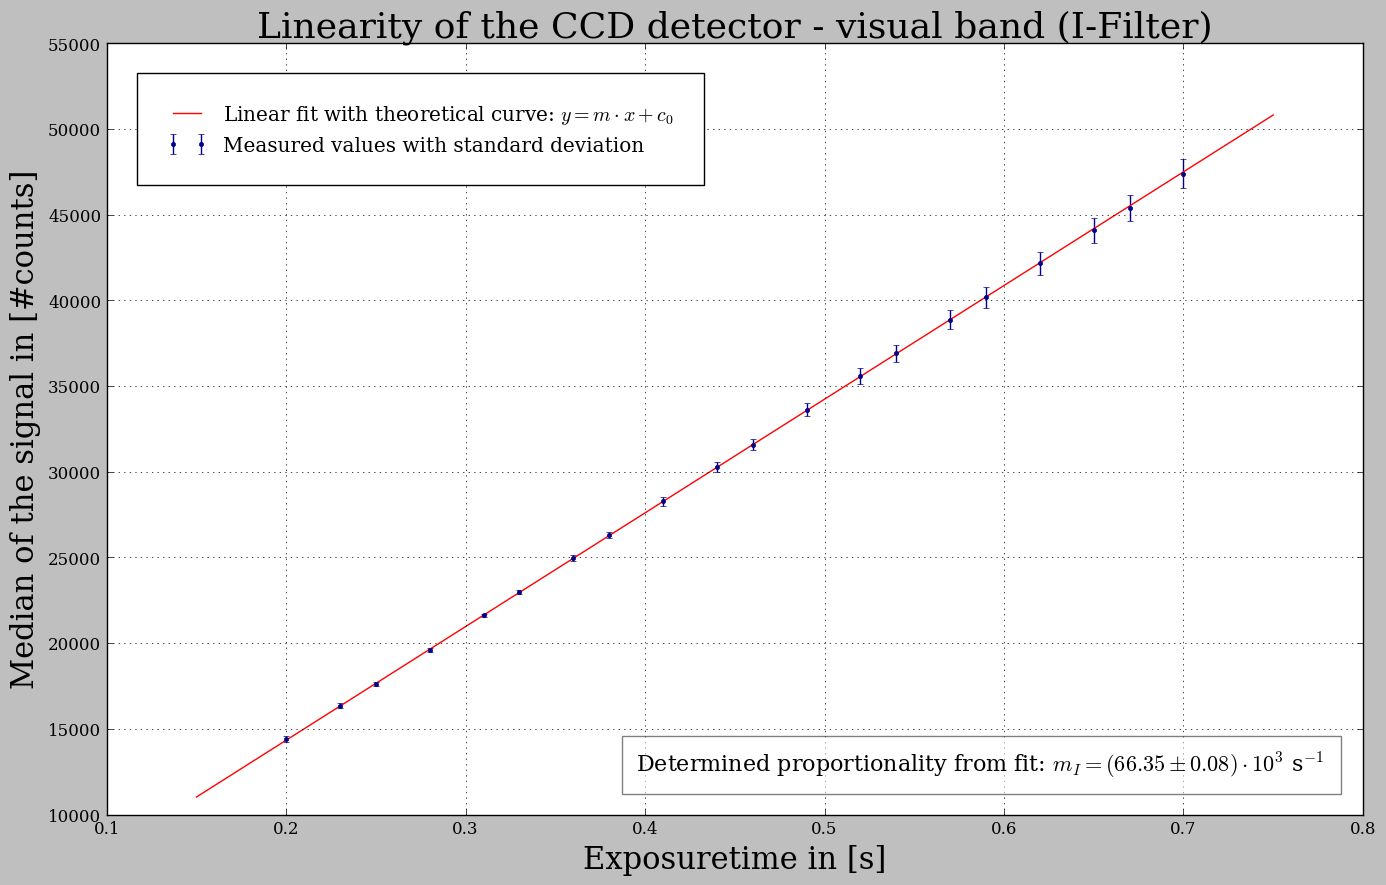

In [21]:
#Plotting

plt.errorbar(timeI, linearI, yerr=linearI_std,linewidth=1,linestyle='',marker='.',color='darkblue',label='Measured values with standard deviation')
plt.plot(fitrangeI,linfit(fitrangeI,*poptI),color='red', label='Linear fit with theoretical curve: $y= m\cdot x + c_0$')
plt.xlim(0.1,0.8)
plt.title("Linearity of the CCD detector - visual band (I-Filter)", size = 26)
plt.xlabel(r'Exposuretime in [s]', size=22)
plt.ylabel(r'Median of the signal in [#counts]', size=22)

plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='upper left')
plt.text(0.395,12500, "Determined proportionality from fit: $m_I = (66.35 \pm 0.08)\cdot 10^3 $ s$^{-1}$ ",bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/linearityI.pdf', format='PDF')

In [21]:
print('The R^2 value for our regression hast been determined to: ' + str(rsquared(timeI,linearI)))

The R^2 value for our regression hast been determined to: 0.999985446198


### 4.5 Sensitivity of the detector and noise properties

In [23]:
#Preparing DATA for plotting
sigma_ro = np.mean([18.94, 18.90])
sigma_tot = np.mean([232.0, 232.9])
signal_med = np.mean([1347, 1346])
sigma_diff = 72.06

In [24]:
print('We got the following results:')
sigma_ph = np.sqrt((sigma_diff ** 2) / 2 - sigma_ro ** 2)
print('The photon noise is: ' + str(sigma_ph))
sigma_prnu = np.sqrt(sigma_tot ** 2 - sigma_ro ** 2 - sigma_ph ** 2)
print('The PRNU noise is: ' + str(sigma_prnu))

We got the following results:
The photon noise is: 47.311260816
The PRNU noise is: 226.796562364


In [25]:
#Determination of the gain
gain = sigma_ph ** 2 / signal_med  #quantum efficiency = 1
print('The gain hast been determined to: ' + str(gain))

The gain hast been determined to: 1.6623508355


In [26]:
#DATA
median_ind = np.loadtxt('DATA/sensitivity/all_median.txt', skiprows = 1,unpack=True)
stdv = np.loadtxt('DATA/sensitivity/all_diff_stv.txt', skiprows = 1,unpack=True)

l = int(median_ind.size / 2)
median = ( median_ind[0:l] + median_ind[l:] ) / 2
mask = (median < 30000)
median_crop = median[mask]
stdv_crop = stdv[mask]

In [27]:
#Fitting
def sigma_diff(N, sigma_R, kappa):
    return (sigma_R ** 2 + N/(kappa ** 2))

start = [20, 2]
popt, pcov = curve_fit(sigma_diff, median_crop, stdv_crop ** 2, p0 = start)
perr = np.sqrt(np.diag(pcov))

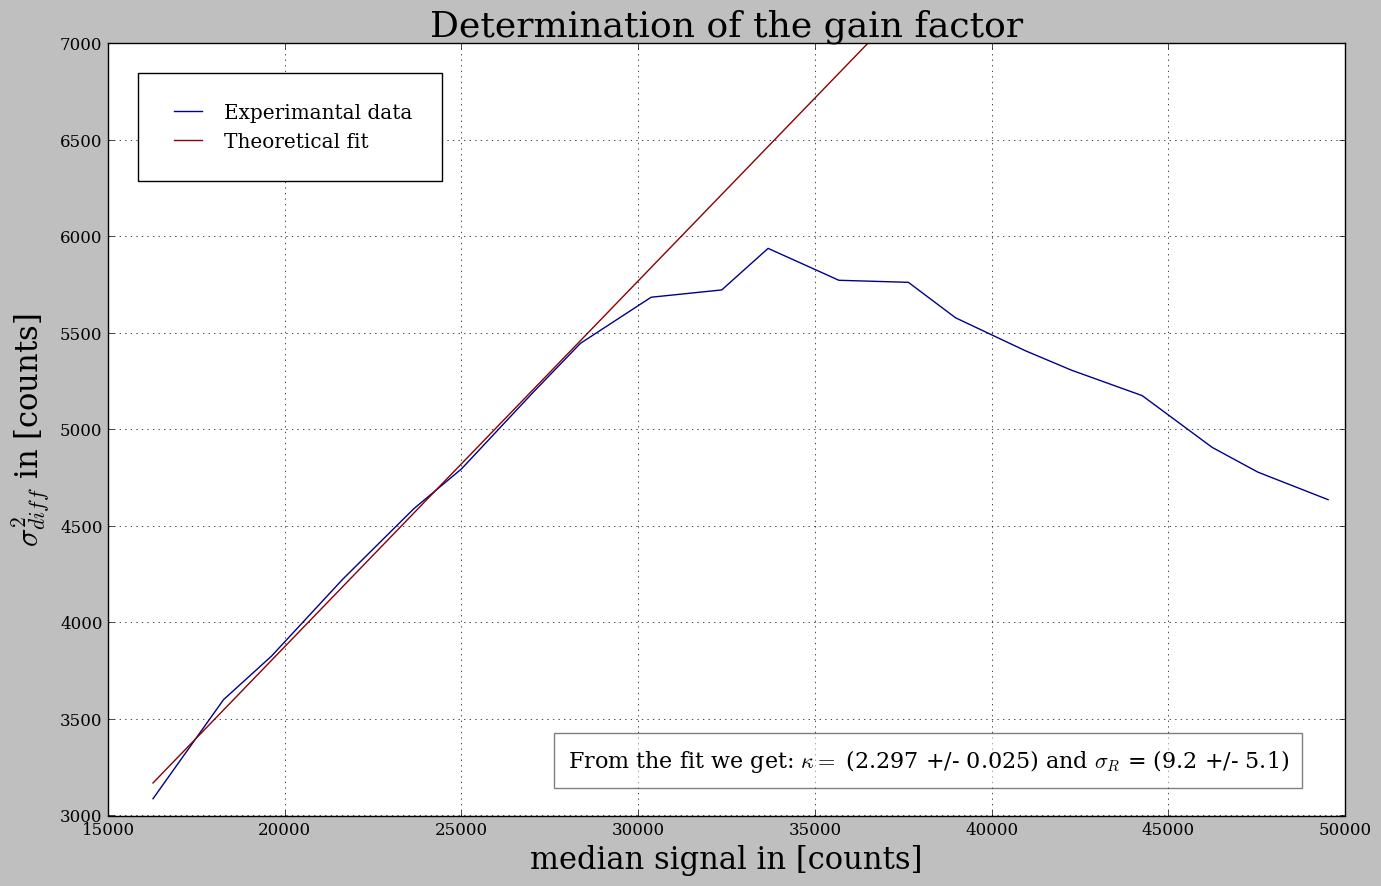

In [28]:
#Plotting
plt.plot(median, stdv ** 2, label = 'Experimantal data',color ='darkblue')
plt.plot(median, sigma_diff(median, *popt), label = 'Theoretical fit', color = 'darkred')
plt.title('Determination of the gain factor',size=26)
plt.ylabel(r'$\sigma_{diff}^2$ in [counts]',size=22)
plt.xlabel('median signal in [counts]',size=22)
plt.ylim(3000,7000)

plt.text(28000,3250,'From the fit we get: $\kappa = $ (' + str(round(popt[1],3)) + ' +/- ' + str(round(perr[1],3)) + ') and $\sigma_R$ = (' + str(round(popt[0],1)) + ' +/- ' + str(round(perr[0],1)) + ')',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=16)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='upper left')
plt.grid(ls='dotted')

#Saving figure
plt.tight_layout()
plt.savefig('Plots/gain.pdf', format='PDF')